In [1]:
import pandas as pd
import numpy as np
import math 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
from yellowbrick.cluster import KElbowVisualizer

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Question 1

In [2]:
# Read the data set, normalise the gender column, drop the ID column(not necessary for cluster)
customer = pd.read_csv("customers.csv")
customer["gender"] = np.where(customer['Gender']=="Female", 1, 0)
customer.drop(['ID', 'Gender'], axis = 1, inplace=True)
customer.head()

,Age,Income,Score,gender
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [3]:
# Apply a Z-score normalisation on the numerical features (age, income and score)
def normalisation(input_data):
    data_normalised = preprocessing.scale(input_data) #Scaling the dataset
    data_normalised = pd.DataFrame(data=data_normalised,columns = list(input_data.columns))
    data_normalised['gender'] = input_data['gender']
    return data_normalised
customer_normalised= normalisation(customer)
customer_normalised.head()

,Age,Income,Score,gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


# Question 2

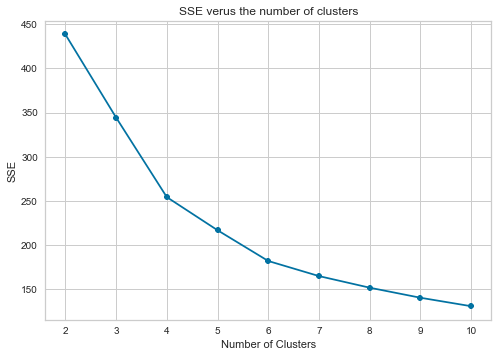

In [4]:
# Draw the plot of SSE verus the number of clusters
sse = []
customer_normalised_minus_gender = customer_normalised.drop(columns=['gender'])
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customer_normalised)
    sse.append(kmeans.inertia_)

plt.plot(range(2,11),sse, marker ="8")
plt.title('SSE verus the number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

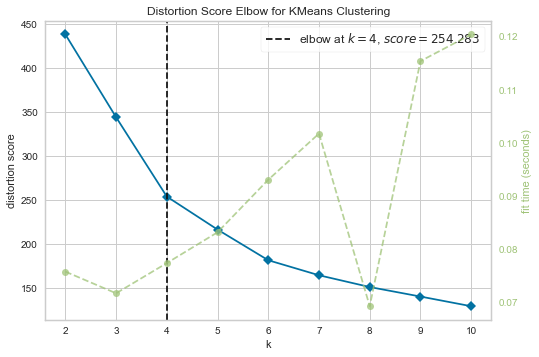

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Use elbow chart to find the best k.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(customer_normalised)      
visualizer.show()

#### Heuristics-Elbow chart: From the elbow method, the optimal k is k=5

# Question 3

In [6]:
# Cluster the samples (Age, Income, Score) using K-means with the best k.
km = KMeans(n_clusters=5)
clusters = km.fit_predict(customer_normalised_minus_gender)
customer["label"] = clusters
customer.head()

,Age,Income,Score,gender,label
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,4
3,23,16,77,1,1
4,31,17,40,1,1


In [7]:
# Calculate the centroid of each clusters
clf = NearestCentroid()
X=customer.iloc[:,0:-2]
y=customer.label
clf.fit(X, y)
centers = clf.centroids_
centers_x = centers[:,0]
centers_y = centers[:,1]
centers_z = centers[:,2]

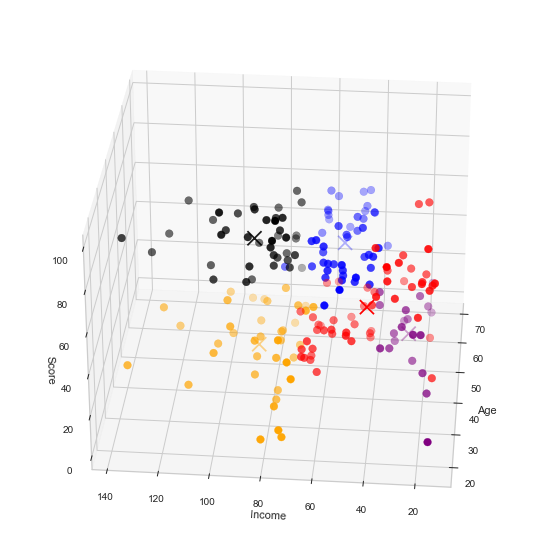

In [37]:
# Plot the clusters and centroids in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.Age[customer.label == 0], customer["Income"][customer.label == 0], customer["Score"][customer.label == 0], c='blue', s=60)
ax.scatter(customer.Age[customer.label == 1], customer["Income"][customer.label == 1], customer["Score"][customer.label == 1], c='red', s=60)
ax.scatter(customer.Age[customer.label == 2], customer["Income"][customer.label == 2], customer["Score"][customer.label == 2], c='black', s=60)
ax.scatter(customer.Age[customer.label == 3], customer["Income"][customer.label == 3], customer["Score"][customer.label == 3], c='orange', s=60)
ax.scatter(customer.Age[customer.label == 4], customer["Income"][customer.label == 4], customer["Score"][customer.label == 4], c='purple', s=60)
ax.scatter(centers_x,centers_y,centers_z,marker = "x",s=200,c=['blue','red','black','orange','purple'])
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Score')
plt.show()

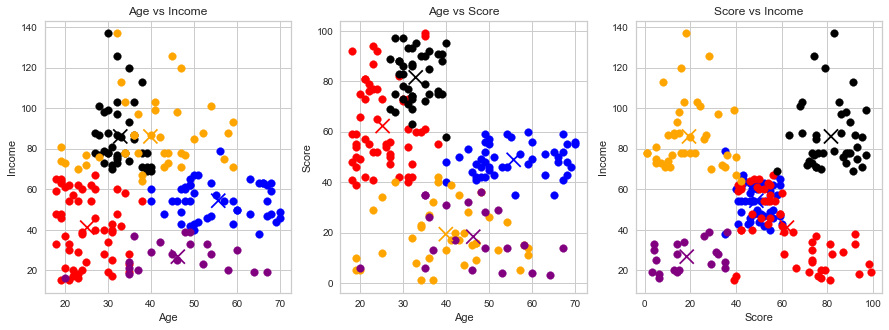

In [38]:
# Draw the clusters in three 2d plots
f, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title("Age vs Income")
ax[0].scatter(customer.Age[customer.label == 0], customer.Income[customer.label == 0], c='blue', s=60)
ax[0].scatter(customer.Age[customer.label == 1], customer.Income[customer.label == 1], c='red', s=60)
ax[0].scatter(customer.Age[customer.label == 2], customer.Income[customer.label == 2], c='black', s=60)
ax[0].scatter(customer.Age[customer.label == 3], customer.Income[customer.label == 3], c='orange', s=60)
ax[0].scatter(customer.Age[customer.label == 4], customer.Income[customer.label == 4], c='purple', s=60)
ax[0].scatter(centers_x,centers_y,marker = "x",s=200,c=['blue','red','black','orange','purple'])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Income')

ax[1].set_title("Age vs Score")
ax[1].scatter(customer.Age[customer.label == 0], customer.Score[customer.label == 0], c='blue', s=60)
ax[1].scatter(customer.Age[customer.label == 1], customer.Score[customer.label == 1], c='red', s=60)
ax[1].scatter(customer.Age[customer.label == 2], customer.Score[customer.label == 2], c='black', s=60)
ax[1].scatter(customer.Age[customer.label == 3], customer.Score[customer.label == 3], c='orange', s=60)
ax[1].scatter(customer.Age[customer.label == 4], customer.Score[customer.label == 4], c='purple', s=60)
ax[1].scatter(centers_x,centers_z,marker = "x",s=200,c=['blue','red','black','orange','purple'])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Score')


ax[2].set_title("Score vs Income")
ax[2].scatter(customer.Score[customer.label == 0], customer.Income[customer.label == 0], c='blue', s=60)
ax[2].scatter(customer.Score[customer.label == 1], customer.Income[customer.label == 1], c='red', s=60)
ax[2].scatter(customer.Score[customer.label == 2], customer.Income[customer.label == 2], c='black', s=60)
ax[2].scatter(customer.Score[customer.label == 3], customer.Income[customer.label == 3], c='orange', s=60)
ax[2].scatter(customer.Score[customer.label == 4], customer.Income[customer.label == 4], c='purple', s=60)
ax[2].scatter(centers_z,centers_y,marker = "x",s=200,c=['blue','red','black','orange','purple'])
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Income')

fig.tight_layout()

# Question 4

In [10]:
# Create three different datasets,(age,income), (age, score), (income, score).
customer_normalised_age_income = customer_normalised_minus_gender[['Age','Income']]
customer_normalised_score_income = customer_normalised_minus_gender[['Score','Income']]
customer_normalised_score_age = customer_normalised_minus_gender[['Score','Age']]

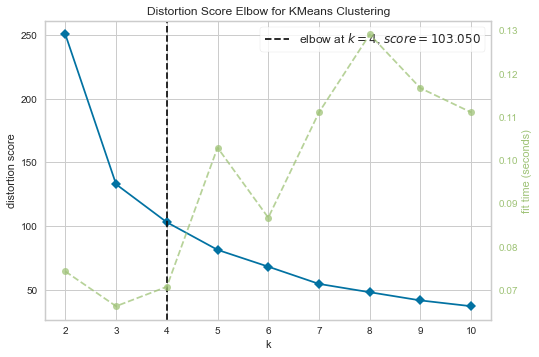

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# Use elbow chart to find the best numbers of cluster for age and income.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(customer_normalised_age_income)      
visualizer.show()

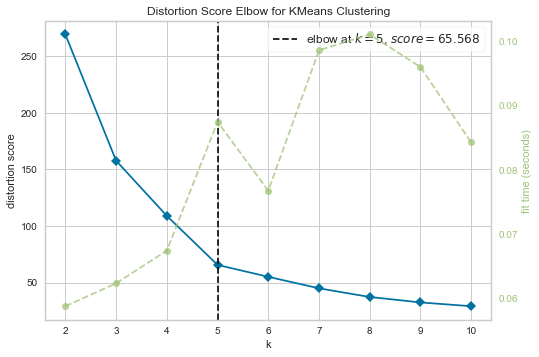

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Use elbow chart to find the best numbers of cluster for score and income.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(customer_normalised_score_income)      
visualizer.show()

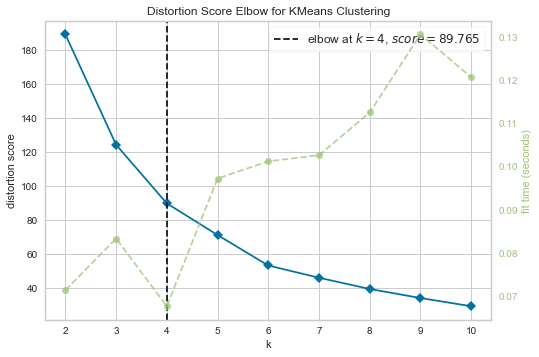

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Use elbow chart to find the best numbers of cluster for score and age.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(customer_normalised_score_age)      
visualizer.show()

In [14]:
best_k_age_income = 4
best_k_score_income = 5
best_k_score_age = 4

# Question 5

In [33]:
# Plot the clusters and distinguish the data points based on the 'Gender' categorical feature.
def return_customer_centroids(factors,n_clusters,customer_dataset = customer,customer_normalised_dataset=customer_normalised):
    customer_part = customer_dataset[factors]
    customer_normalised_part = customer_normalised[factors]
    km = KMeans(n_clusters)
    clusters = km.fit_predict(customer_normalised_part[factors[:2]])
    customer_part["label"] = clusters
    customer_part_male = customer_part.loc[customer_part.gender == 0]
    customer_part_female = customer_part.loc[customer_part.gender == 1]
    return customer_part_male,customer_part_female

factors_Age_Income = ['Age','Income','gender']
factors_Score_Income = ['Score','Income','gender']
factors_Age_Score = ['Age','Score','gender']

customer_Age_Income_Male,customer_Age_Income_Female = return_customer_centroids(factors_Age_Income,best_k_age_income)
customer_Score_Income_Male,customer_Score_Income_Female = return_customer_centroids(factors_Score_Income,best_k_score_income)
customer_Age_Score_Male,customer_Age_Score_Female = return_customer_centroids(factors_Age_Score,best_k_score_age)

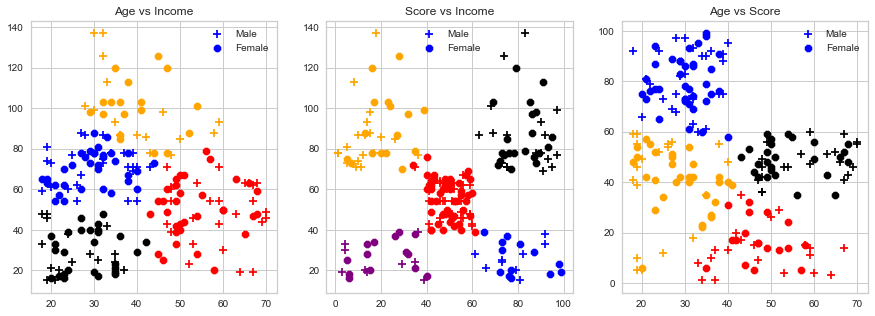

In [34]:
# Draw the clusters in three 2d plots
f, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title("Age vs Income")
ax[0].scatter(customer_Age_Income_Male.Age[customer_Age_Income_Male.label == 0], customer_Age_Income_Male.Income[customer_Age_Income_Male.label == 0],marker ='+', c='blue', s=60, label='Male')
ax[0].scatter(customer_Age_Income_Male.Age[customer_Age_Income_Male.label == 1], customer_Age_Income_Male.Income[customer_Age_Income_Male.label == 1],marker ='+', c='red', s=60)
ax[0].scatter(customer_Age_Income_Male.Age[customer_Age_Income_Male.label == 2], customer_Age_Income_Male.Income[customer_Age_Income_Male.label == 2],marker ='+', c='black', s=60)
ax[0].scatter(customer_Age_Income_Male.Age[customer_Age_Income_Male.label == 3], customer_Age_Income_Male.Income[customer_Age_Income_Male.label == 3],marker ='+', c='orange', s=60)
ax[0].scatter(customer_Age_Income_Female.Age[customer_Age_Income_Female.label == 0], customer_Age_Income_Female.Income[customer_Age_Income_Female.label == 0],marker ='8', c='blue', s=60,label='Female')
ax[0].scatter(customer_Age_Income_Female.Age[customer_Age_Income_Female.label == 1], customer_Age_Income_Female.Income[customer_Age_Income_Female.label == 1],marker ='8', c='red', s=60)
ax[0].scatter(customer_Age_Income_Female.Age[customer_Age_Income_Female.label == 2], customer_Age_Income_Female.Income[customer_Age_Income_Female.label == 2],marker ='8', c='black', s=60)
ax[0].scatter(customer_Age_Income_Female.Age[customer_Age_Income_Female.label == 3], customer_Age_Income_Female.Income[customer_Age_Income_Female.label == 3],marker ='8', c='orange', s=60)
ax[0].legend()

ax[1].set_title("Score vs Income")
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.label == 0], customer_Score_Income_Male.Income[customer_Score_Income_Male.label == 0],marker ='+', c='blue', s=60, label='Male')
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.label == 1], customer_Score_Income_Male.Income[customer_Score_Income_Male.label == 1],marker ='+', c='red', s=60)
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.label == 2], customer_Score_Income_Male.Income[customer_Score_Income_Male.label == 2],marker ='+', c='black', s=60)
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.label == 3], customer_Score_Income_Male.Income[customer_Score_Income_Male.label == 3],marker ='+', c='orange', s=60)
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.label == 4], customer_Score_Income_Male.Income[customer_Score_Income_Male.label == 4],marker ='+', c='purple', s=60)
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.label == 0], customer_Score_Income_Female.Income[customer_Score_Income_Female.label == 0],marker ='8', c='blue', s=60,label='Female')
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.label == 1], customer_Score_Income_Female.Income[customer_Score_Income_Female.label == 1],marker ='8', c='red', s=60)
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.label == 2], customer_Score_Income_Female.Income[customer_Score_Income_Female.label == 2],marker ='8', c='black', s=60)
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.label == 3], customer_Score_Income_Female.Income[customer_Score_Income_Female.label == 3],marker ='8', c='orange', s=60)
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.label == 4], customer_Score_Income_Female.Income[customer_Score_Income_Female.label == 4],marker ='8', c='purple', s=60)
ax[1].legend()

ax[2].set_title("Age vs Score")
ax[2].scatter(customer_Age_Score_Male.Age[customer_Age_Score_Male.label == 0], customer_Age_Score_Male.Score[customer_Age_Score_Male.label == 0],marker ='+', c='blue', s=60, label='Male')
ax[2].scatter(customer_Age_Score_Male.Age[customer_Age_Score_Male.label == 1], customer_Age_Score_Male.Score[customer_Age_Score_Male.label == 1],marker ='+', c='red', s=60)
ax[2].scatter(customer_Age_Score_Male.Age[customer_Age_Score_Male.label == 2], customer_Age_Score_Male.Score[customer_Age_Score_Male.label == 2],marker ='+', c='black', s=60)
ax[2].scatter(customer_Age_Score_Male.Age[customer_Age_Score_Male.label == 3], customer_Age_Score_Male.Score[customer_Age_Score_Male.label == 3],marker ='+', c='orange', s=60)
ax[2].scatter(customer_Age_Score_Female.Age[customer_Age_Score_Female.label == 0], customer_Age_Score_Female.Score[customer_Age_Score_Female.label == 0],marker ='8', c='blue', s=60,label='Female')
ax[2].scatter(customer_Age_Score_Female.Age[customer_Age_Score_Female.label == 1], customer_Age_Score_Female.Score[customer_Age_Score_Female.label == 1],marker ='8', c='red', s=60)
ax[2].scatter(customer_Age_Score_Female.Age[customer_Age_Score_Female.label == 2], customer_Age_Score_Female.Score[customer_Age_Score_Female.label == 2],marker ='8', c='black', s=60)
ax[2].scatter(customer_Age_Score_Female.Age[customer_Age_Score_Female.label == 3], customer_Age_Score_Female.Score[customer_Age_Score_Female.label == 3],marker ='8', c='orange', s=60)
ax[2].legend()

fig.tight_layout()